# 1. Presentación de la empresa, organización o problema específico  

#### De acuerdo a la Organización Mundial de la Salud (OMS), ACV es la segunda causa de muerte a nivel global, responsable de aproximadamente 11% de las muertes totales.
#### Este set de datos es utilizado para predecir si un paciente es propenso a tener un ACV basado en los parametros como género, edad, enfermedades varias, y estado de fumador. Cada fila en los datos provee información relevante sobre el paciente.


#### 2. Preguntas y objetivos de la investigación.

.¿Cuál es el género más propenso a tener un acv?  
.¿Cuál es el grado de influencia de ser fumador?  
.¿Existe relación entre el índice de masa corporal y el nivel de glucosa para contraer un acv?  
.¿Qué tanto influye el tipo de trabajo en la posibilidad de tener un acv?  
.¿Aumentan las probabilidades de tener un acv a mayor edad?    
.¿Tener hipertensión influye a la hora de tener un acv?  // Se cambió la pregunta en base a la corrección de Maxi, no tenemos niveles de hipertensión, sólo veradero o falso
.¿Tiene relación el estado marital con tener un acv?  


El objetivo de la investigación es determinar cuales son las variables mas influyentes a la hora de provocar un acv. Utilizando un modelo de predicción vamos a poder determinar si una persona es mas propensa a tener un acv.





#### 3. Conformación del equipo de trabajo. 
Martin Marino  
Leandro Bruzzo  
Luis Almaguer

# 4. Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)
#### El dataset fue obtenido de la plataforma Kaggle desde el siguiente link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Información sobre el data set:
- Creador: fedesoriano - https://www.kaggle.com/fedesoriano

- Información de los atributos: 
1) id: identificador único  
2) gender: "Male", "Female" o "Other" (Masculino, Femenino u Otro)  
3) age: Edad del paciente  
4) hypertension: 0 si el paciente no tiene hipertensión , 1 si el paciente tiene hipertensión  
5) heart_disease: 0 si el paciente no tiene enfermedades del corazón, 1 si el paciente tiene enfermedades del corazón  
6) ever_married: "No" o "Yes" (No o Sí)  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Niño, trabajo en el sector público, nunca trabajó, privado o monotributista)  
8) Residence_type: "Rural" or "Urban"   
9) avg_glucose_level: nivel promedio de glucosa en la sangre  
10) bmi: Índice de masa corporal  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (Fumador frecuente, nunca fumó, fuma, desconocido)  
12) stroke: 1 si el paciente tuvo un ACV 0 si no lo tuvo (Variable Target)  
*Nota: 'Uknown' en smoking_status indica que no se registró un estado del paciente.

Información sobre Kaggle:
Kaggle, una subsidiaria de Google LLC, es una comunidad en línea de científicos de datos y profesionales del aprendizaje automático.

#### 5. Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

In [139]:
#Librerías neceasrias para el correcto funcionamiento del jupyter (descomentar para ejecutar por primera vez y luego volver a comentarlo)

# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas_profiling
# !{sys.executable} -m pip install plotly.express
# !{sys.executable} -m pip install ipywidgets
# !{sys.executable} -m pip install nbformat


In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px


In [141]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [142]:
df.shape

(5110, 12)

In [143]:
# para ser del todo correctos, en este diagrama no debería estar incluida la varaible stroke, hypertension y 
#hearth_disease ya que tambien son categóricas aunque esten expresadas como números
# De todas formas les recomiendo que no la cambien porque es util tenerla asi para los diagramas de correlacion por ejemplo
# En este sentido, si quisieran incluir las variables ever_married o residence_type en la matriz de correlación, 
# podrian crear un df_2 cambiando los valores tambien por 0 y 1.

In [144]:
#Creamos un dataframe con las columnas work_type y residence_type en booleano (Es decir, 0 y 1) para ser utilizados en la matriz de correlación

df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)
df_2 = df #Realizamos una copia del dataframe original para la matriz de correlación
#Reemplazamos los valores Yes y No de ever_married con 1 y 0
df_2['ever_married'].replace(
                to_replace=['Yes', 'No'], 
                value=[1,0,], 
                inplace=True, 
)
df_2['residence_type'].replace(
                to_replace=['Urban', 'Rural'], 
                value=[0,1,], 
                inplace=True, 
)

df_2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,1,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,0,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [145]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
residence_type,5110.0,0.491977,0.499985,0.00,0.000,0.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### EDA Utilizando la librería pandas_profiling

In [146]:
df_2.profile_report(title='Data Profiling')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Análisis Univariado

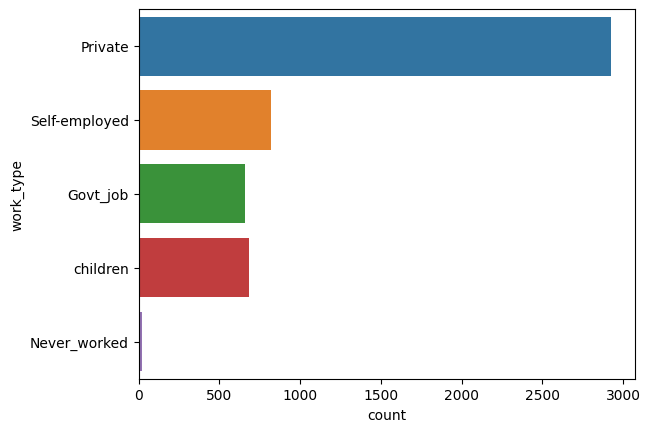

In [147]:
#Graficamos la cantidad de gente por tipo de trabajo

sns.countplot(y='work_type',data=df)
plt.show()

In [148]:
#Graficamos la cantidad de gente por índice de masa corporal

a = df['bmi'].value_counts().sort_index().plot.hist().set_title('BMI')
#Ponerle tambien titulo al eje x. Para este caso no aplica, pero para los que tengna unidades se suele poner 
# Age (Years) / Edad (años) / Variable (unidad_de_medicion)... En la descripcion del dataset no estan mencionadas, no se si 
# porque no lo pusieorn ustedes, o no estaba descripto. Sería adecuado tenerlo
# En los histogramas es adecuado ver los limites de cada bin, que los mismos coincidan con la marca de cada etiqueta en x por ejemplo

In [149]:
#Graficamos la cantidad de gente por nivel de glucosa

df['avg_glucose_level'].plot.hist().set_title('AVG Glucose Level')
#Mismo comentarios que grafico anterior

Text(0.5, 1.0, 'AVG Glucose Level')

In [150]:
df_pie = df.copy()
df_pie['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
fig = px.pie(df_pie, names="stroke",values='id', hole=.3, title='Stroke Distribution')
fig.show()
# que es 0 y 1. Deberia ser claro en el gráfico

In [151]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [152]:
# bien los graficos pero faltaria entender porque volvieron a graficar estas variables, y no todas. Hay algun motivo?
# Además hay casos en donde se podria observa la presencia de outliers, que por el tipo de visualizaciones que eligieron no estamos pudiendo ver
# Es bueno mostrarlos para tenerlo en consideracion, y llegado el caso justificar su preservacion o eliminación
# De la misma manera en la matriz de estadisticos del principio se ve que en una columna tienen campos nulos. Van a hacer algo con esos datos?

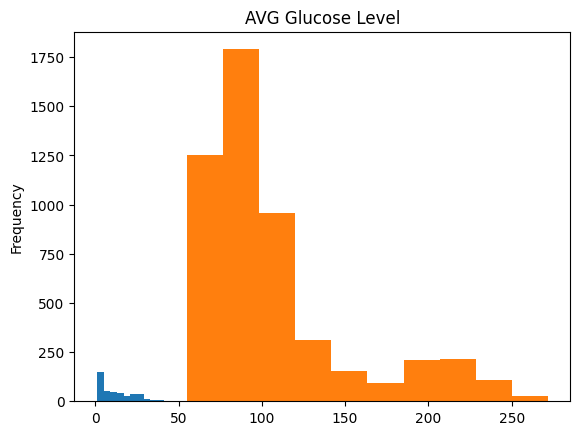

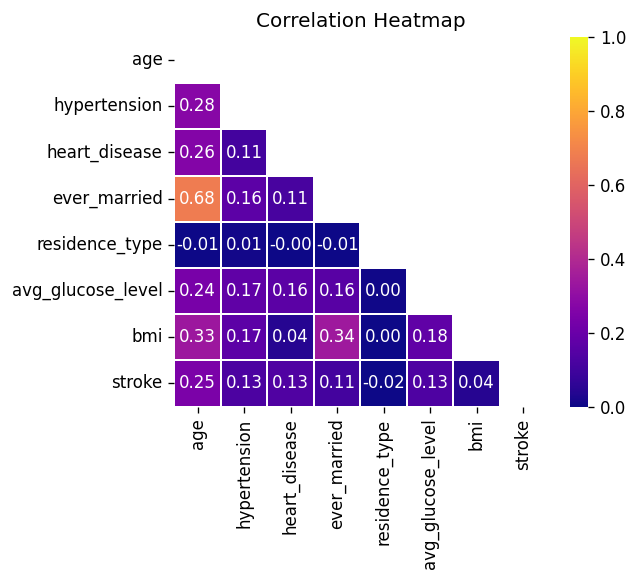

In [153]:
#Creamos un df sin la columna id
df_2Heatmap = df_2.drop(columns=['id'])
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_2Heatmap.corr(),dtype = bool))
sns.heatmap(df_2Heatmap.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', vmax=1, vmin=0)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

#Aca perfecto... pero les planteo un debate. El presentar la matriz por la mitad hace que el eje de color se ajuste al nuevo maximo
#, eso ayuda a ver mejor la variación de correlaciones, pero a la vez, nos puede marcar en un color fuerte algo que aún siga siendo 
# una correlación baja. Para que tomen una decision ustedes si dejarlo así, o que el color tome como maximo 1 y como minimo 0

#### Análisis Bivariado

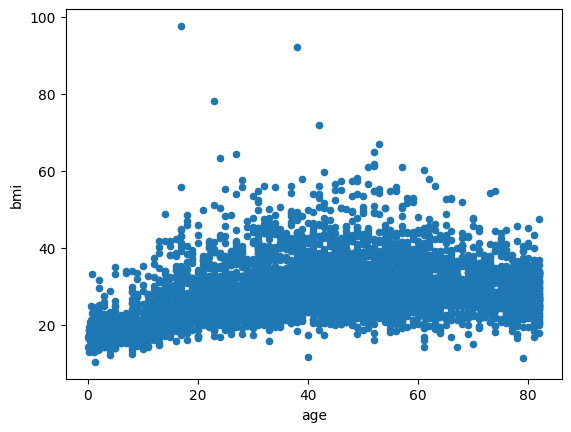

In [154]:
#Scatterplot para observar si hay una correlación entre la edad y el indice de masa corporal.
df.plot.scatter(x='age', y='bmi')
# y que observan...?? podrian agregarle una recta de regresión... vimos en la clase multivariado como hacerlo
plt.show()

#Lean

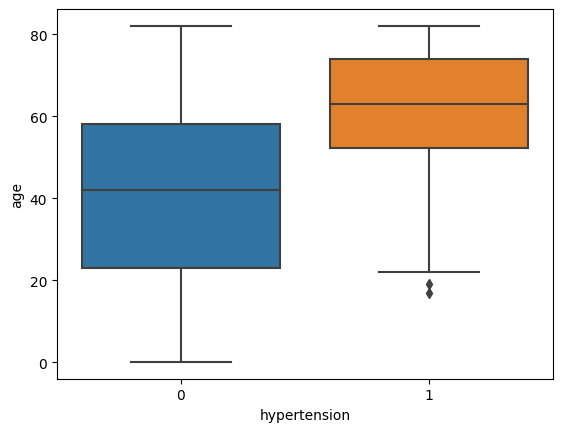

In [155]:
#Con el gráfico de cajas podemos observar que la edad tiene una correlación positiva con la hipertensión.
sns.boxplot(y = 'age', x = 'hypertension', data = df)
plt.show()

#### Análisis Multivariado

c:\Users\TINCHO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



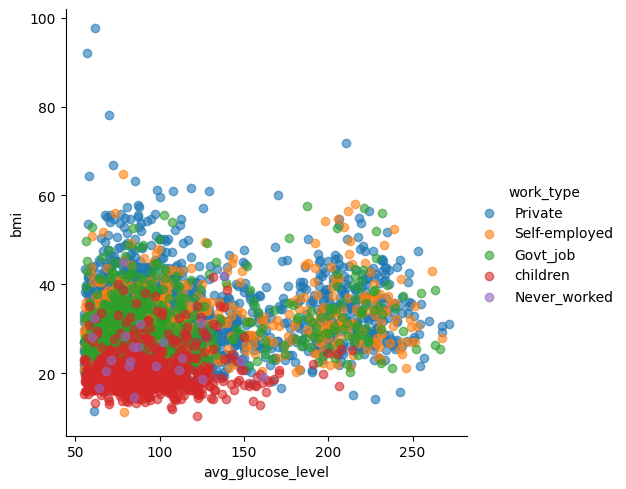

In [156]:
#Intentamos visualizar si el tipo de trabajo tiene una relación con el índice de masa corporal y el nivel de glucosa en la sangre.  
sns.FacetGrid(df,hue = 'work_type' , size = 5).map(plt.scatter,'avg_glucose_level','bmi', alpha  = 0.6).add_legend();
plt.show()

# y que concluyeron... pueden ver algo en el gráfico? será el adecuado? talvez pueden hacer el analisis por separado y dejar este tipo de gráficos para pocas categorias como el siguiente

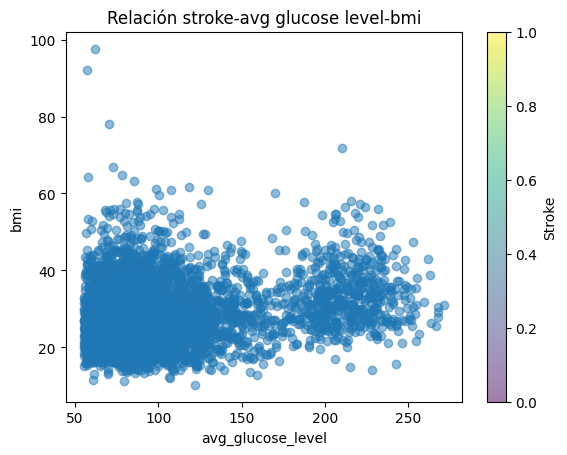

In [157]:
#Profundizando en el análisis las variables de nivel de glucosa e índice de masa corporal,  
#intentamos visualizar si existe una relación con la probabilidad de tener un acv 

fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df['avg_glucose_level'], df['bmi'], alpha = 0.5)
fig.colorbar(mapeo_colores, label="Stroke")  #Añado barra de colores

ax.set_title('Relación stroke-avg glucose level-bmi')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('bmi')
plt.show()


# aca deberia ser categórico el stroke.. solo dos colores. no una barra. Pueden castear el campo a string, y que incluso sea mas claro y sea true/false, si/no

In [158]:
#Determinamos los valores promedio de ambas variables para ver la relación que tienen con la 
#posibilidad de tener un acv

bmi_mean = df['bmi'].mean()
glucose_mean = df['avg_glucose_level'].mean()

print('BMI promedio: ',bmi_mean,'\n',
      'Nivel de glucosa promedio es: ',glucose_mean)


# Si quieren ver esto deberian graficar bmi y glucose contra stroke por ejemplo. Aca solo vemos el promedio de todo el dataset, que ya lo teniamos al principio

BMI promedio:  28.893236911794666 
 Nivel de glucosa promedio es:  106.1476771037182


In [159]:
#Vemos los valores unicos para la columna de smoking status y posteriormente excluimos los desconocidos
df['smoking_status'].unique()

# Excelente. Ahora... que van a hacer con los registros que tienen Unknown???

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### En smoking_status se puede observar que tenemos valores "Unknown", se realizará un conteo de los mismos para observar el impacto de su eliminación, ya que dicho estado no nos aporta nada en el análisis.

In [160]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### Unknown tiene una cantidad de registros de 1544, aproximadamente el 30% de los datos. Debido a que no podemos asumir si esa persona fuma o no, se tomará la decisión de eliminarlos. 

In [161]:
#Eliminar los datos unknown de la columna smoking_status

df['smoking_status'].values
df = df[df.smoking_status != 'Unknown']
df.smoking_status.value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### BMI tiene 140 valores nulos, los mismos podrían ser eliminados pero debido a que el dataset perdió gran cantidad de datos al eliminar los registros con smoking_status = Unknown, se precederá a utilizar un promedio para los mismos.


In [162]:
for i in df.columns[df.isnull().any(axis=0)]:   
    df[i].fillna(df[i].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   int64  
 6   work_type          3566 non-null   object 
 7   residence_type     3566 non-null   int64  
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3566 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 362.2+ KB


C:\Users\TINCHO\AppData\Local\Temp\ipykernel_9864\1231436049.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Como se pudo observar en la línea anterior, se han completados los valores NaN de la columna bmi con el valor promedio de los mismos

#### A continuación realizaremos gráficos de boxplot para todas las columnas, con el fin de observar con mayor detalle la distribución de valores junto a la presencia (o no) de outliers.

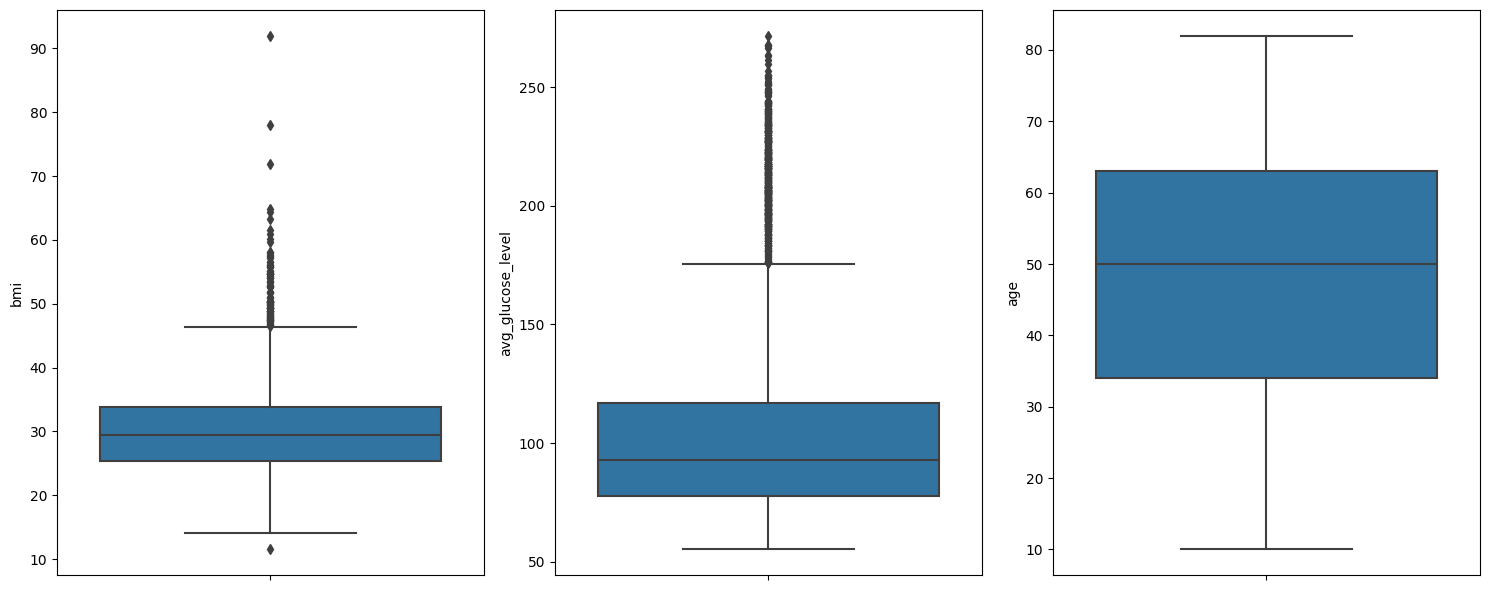

In [163]:
variables = ['bmi', 'avg_glucose_level', 'age']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

plt.show()

#### En los gráficos de boxplot se puede observar que tanto bmi como avg_glucose_level tienen outliers significantes. Los mismos se mantendran en el dataset ya que a pesar de ser outliers, su presencia es crucial

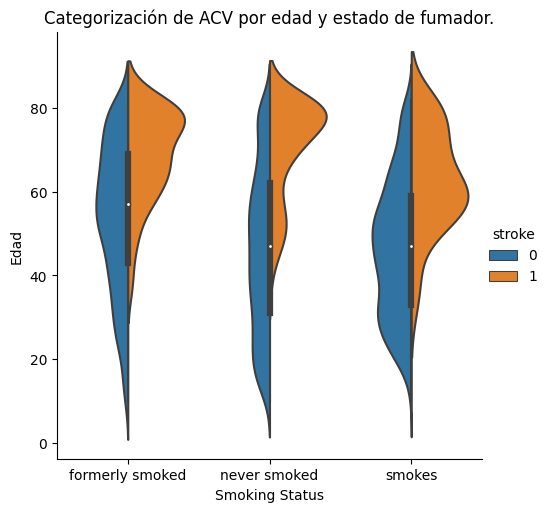

In [164]:
#Intento visualizar el volumen de acv según el estado de fumador y su edad
df_smoking = df[(df['smoking_status']) != 'Unknown']

ax = sns.catplot(data=df_smoking, kind='violin', x='smoking_status', y='age',   hue='stroke', split=True)
ax.set(xlabel='Smoking Status', ylabel='Edad', title='Categorización de ACV por edad y estado de fumador.')
plt.show()
#Excelente que titulen los graficos. Haganlos en todos. Pero el titulo eb este se queda corto. No es solo eso.

In [165]:
df.gender.value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

#### En la columna gender podemos observar que hay un único registro con el género other, por motivos de espacio de memoria el mismo será eliminado ya que al preparar el dataset para utilizar algoritmos de clasificación empleando data dummies, se creará una columna extra en consecuencia de este único valor.

In [166]:
df = df[df.gender != 'Other']
df.gender.value_counts()

Female    2158
Male      1407
Name: gender, dtype: int64

#### Una vez realizado los diferentes tipos de análisis y limpieza de datos necesaria, es momento de aplicar algoritmos de clasificación.

In [167]:
#Creamos un data dummie para obtener las variables categóricas como booleanas (es decir 0,1)
df_dummy = pd.get_dummies(df)
df_dummy = df_dummy.drop('id', axis=1) #Dropeamos la columna de id ya que la misma es irrelevante para el algoritmo.
df_dummy

,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0
1,61.0,0,0,1,1,202.21,30.290047,1,1,0,0,0,0,1,0,0,1,0
2,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.400000,1,1,0,0,0,1,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.000000,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,57.0,0,0,1,1,77.93,21.700000,0,1,0,0,0,1,0,0,0,1,0
5105,80.0,1,0,1,0,83.75,30.290047,0,1,0,0,0,1,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.000000,0,1,0,0,0,0,1,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.600000,0,1,0,0,0,0,1,0,0,1,0


In [186]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('stroke', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.stroke #Defino el Target

In [206]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42) 

In [207]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [208]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [209]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [210]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9415614773258532
% de aciertos sobre el set de evaluación: 0.9460028050490884


#### 6. Análisis de componentes principales.

#### 7. Contar la historia de sus datos

#### 8. Filtros aplicados a los datos. Distribución. Dataset final para analizar.


#### 9. Plantear objetivo/s para esos datos.

Buenas grupo... el trabajo presentado está correcto.  
Está debidamente fundamentado el problema,la utilidad de un modelo de ML en el caso de uso, y me parecen super adecuadas las preguntas a modo de hipótesis que se plantean. Sobre todo porque un modelo de ML no puede limitarse a hacer una predicción sino que tiene que aportar insights, que permitan una acción sobre lo que se predijo (deje de fumar, suba la glucosa, váyase a un ambiente rural, etc)
Los gráficos del análisis univariado que hicieron a mano están bien, pero mantengan un criterio, a algunos les ponen título y descripción del eje x (lo que está bien), y a otros no. Un poco imagino que tiene que ver con que van cambiando de librerías para la visualización. No está mal eso, pero cada una tiene su forma de setearle ese tipo de cosas.
Estaría bueno incluir porque graficaron las variables del análisis univariado, y no lo hicieron con todas, si es que hay un motivo. 
De los gráficos que incluyeron, se ve que tenemos un dataset desbalanceado en la variable target. Super importante destacarlo porque va a implicar ciertas acciones cuando pongamos el modelo en producción. 
Cuando me consultan sobre filtros… en esta primera parte del análisis se ve que tienen una variable con datos nulos. Lo mismo aplica para la categoría unknown de si fuma. Es decisión de ustedes que hacer, pero saben que algo tienen que hacer con esas dos cuestiones. Que pueden decir respecto a outliers?? no veo ninguna gráfico que permitan en principio ver si los tenemos, y llegado el caso que hacer con ellos.
En la parte de análisis bivariado es el momento de tratar de aproximarse a responder las preguntas que se hacen al principio….. pero casi ninguno de los gráficos representa el universo de variables que plantean. 
En la parte de analisis multivariado el primer gráfico tal vez está muy cargado, habría que pensar si tiene sentido su inclusión u otra manera de mostrar lo que quieran ver. En el segundo es conceptualmente errónea la colorbar. Es categórica la variable stroke, no contínua. La parte de los promedio medio colgada en esa parte, y no ejemplifica lo que describen. 

Los puntos que marcan del 6 al 9 están (o deberían estar metido) en lo que ya tienen armado. Analisis de componentes principales es un PCA que vimos en la clase 11. Lejos en el tiempo, y no es algo que valga la pena forzar. Si lo consideran util buenisimo, sino no se preocupen. Contar la historia es un poco lo que les resalto con las mejoras que les propongo. Que lo que vayan mostrando siga un hilo conductor, que responda preguntas que se hagan. Filtrar los datos lo van a hacer considerando los casos de nulos, unknown, y outliers. La idea es dejar el dataset final listo para analizar…. y en este sentido les pregunto que pasa con la variable residence_type que nunca la mencionan y la analizan. Si no la van a considerar, borrenla, y justifiquen. 

Quedo atento a sus dudas..... y a lo largo de la notebook van a ir viendo algunos comentarios también. 


In [168]:
#Eliminar análisis univariado que se repite con el profiling (Lean)
#Normalizar títulos y ejes en los gráficos (Lean)
#Cambiar análisis bivariado (Lean)
#Cambiar análisis multivariado (Lean)
#Definir que hacemos con outliers y nulos de bmi (Tincho)
#Completar lo de contar historia de datos (Los dos)
#Elegir algoritmo (Tree-Random forest) (Tincho)
#Presentación ejecutiva (Lean)